# CMPE 257 Homework 2

## Question 1

### a. Load dataset from csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector

data = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\HW2\Homework 2\datasetHW2.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### b. Remove the header which is 0th row.

In [2]:
# data = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\HW2\Homework 2\datasetHW2.csv", header = None)

In [3]:
df = data.drop([0])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

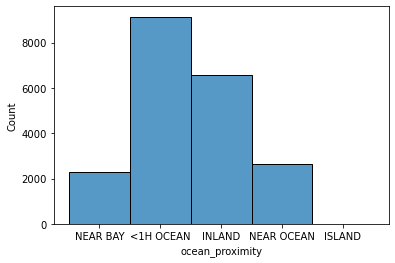

In [4]:
sbn.histplot(data=df['ocean_proximity'])  

In [5]:
# converting catagorical data into numerical using label encoder

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder_X= LabelEncoder()
data['ocean_proximity']= LabelEncoder_X.fit_transform(data['ocean_proximity'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


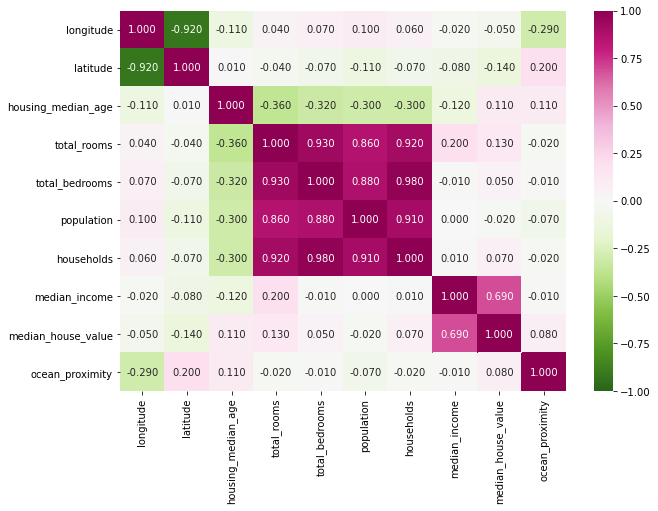

In [6]:
# To determine target

corrs = data.corr().round(2)
plt.figure(figsize = (10, 7))
sbn.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

Observation:
 - From the above heatmap we can choose households as our target variable.
 - Other variables that can also be considered are population, total_bedrooms, total_rooms

### c. Split the dataset into 70:30 training set and test set (non-repetitive random selection).

In [7]:
x = data.drop('households', axis = 1)  #selecting all columns except households
y = data.iloc[:, 6:7]                  #selecting households as target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [8]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity
5748,-118.27,34.16,15.0,5036.0,1299.0,3164.0,2.9148,238700.0,0
5592,-118.26,33.80,41.0,2004.0,481.0,1658.0,3.1779,171100.0,0
2110,-119.75,36.75,49.0,2331.0,460.0,1290.0,2.5111,55400.0,1
13901,-116.56,34.06,15.0,6928.0,1529.0,2568.0,2.5405,69600.0,1
18425,-121.83,37.26,7.0,3609.0,751.0,1739.0,4.5033,213100.0,0


In [9]:
X_train.shape  

(14448, 9)

### d. Plot each feature against the target in the training set.

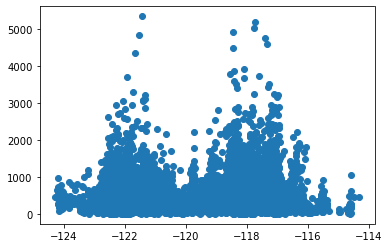

In [10]:
plt.scatter(X_train.longitude,y_train)

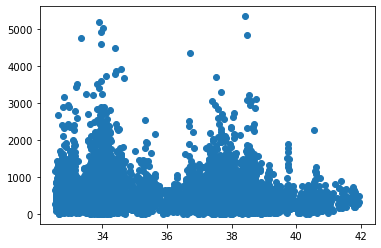

In [11]:
plt.scatter(X_train.latitude,y_train)

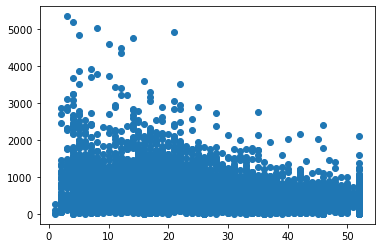

In [12]:
plt.scatter(X_train.housing_median_age,y_train)

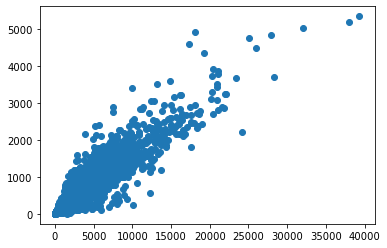

In [13]:
plt.scatter(X_train.total_rooms,y_train)

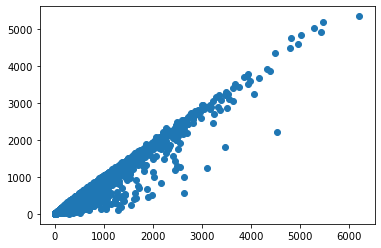

In [14]:
plt.scatter(X_train.total_bedrooms,y_train)

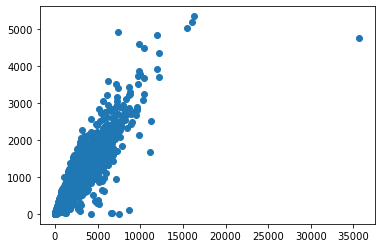

In [15]:
plt.scatter(X_train.population,y_train)

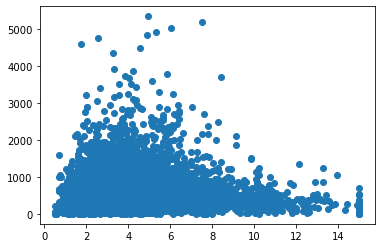

In [16]:
plt.scatter(X_train.median_income,y_train)

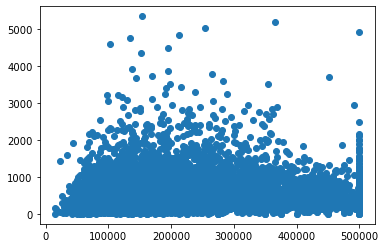

In [17]:
plt.scatter(X_train.median_house_value,y_train)

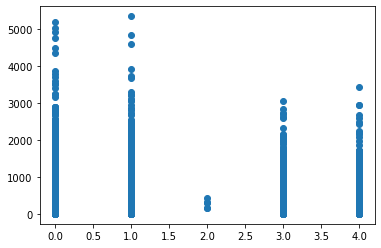

In [18]:
plt.scatter(X_train.ocean_proximity,y_train)

### e. Write down your observations on the above plots to find which features had maximum influence on the target.

Observation:
 - From the above plots features which had maximum infuluence over the target are:
    - total_rooms
    - total_bedrooms
    - population
 - All the above three had high positive correlation compared to other features

### f. What kind of a problem is this? (eg. classification, regression, clustering, etc).

 The promblem is tasked to find the influence over other features and identify the important feature.So, we can conclude this is a REGRESSION problem.

### g. Get the quick description of data using info() and description() functions.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [20]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


### h. Perform min-max normalization on features and target.

In [21]:
minmax = MinMaxScaler()
X_fit = minmax.fit(X_train)
X_norm = X_fit.transform(X_train)
y_fit = minmax.fit(y_train)
y_norm = y_fit.transform(y_train)

In [24]:
print(X_norm)

[[0.6036036  0.17215728 0.2745098  ... 0.16654253 0.46123727 0.        ]
 [0.6046046  0.13390011 0.78431373 ... 0.18468711 0.3218564  0.        ]
 [0.45545546 0.44739639 0.94117647 ... 0.13870154 0.08330069 0.25      ]
 ...
 [0.6046046  0.1477152  0.80392157 ... 0.04363388 0.18515594 0.        ]
 [0.71471471 0.12646121 0.17647059 ... 0.14705314 0.25917625 0.25      ]
 [0.21021021 0.55791711 0.66666667 ... 0.12439139 0.2288671  0.75      ]]


In [25]:
print(y_norm)

[[0.21915251]
 [0.0849356 ]
 [0.0888557 ]
 ...
 [0.05450812]
 [0.0888557 ]
 [0.07261527]]


### i. Describe rules of NumPy Broadcasting.

Rules of Numpy Broadcasting:
 1. All array in the input must have the same shape.
 2. Arrays having the same number of dimensions, and the length of each dimension is either a common length or 1.
 3. Those arrays with the fewer dimension can be appended with '1' in its shape.

### j. Describe the purpose of numpy.reshape with a valid example


Purpose of reshape function in Numpy library is to change the shape of an array without changing its original data. It helps in provinding new shape to an array based on the required usecase.

In [26]:
# Example:

a = np.arange(8) 
print("The Original array : \n", a) 

# shaping the array with 2 rows and 4 columns 
a1= np.arange(8).reshape(2, 4) 
print("\n The reshaped array with 2 rows and 6 columns : \n", a1) 

# shaping the array with 4 rows and 2 columns 
a2 = np.arange(8).reshape(4,2) 
print("\n The reshaped array with 6 rows and 2 columns : \n", a2) 

# Construction of a 3D array 
a3 = np.arange(12).reshape(2, 3, 2) 
print("\nAfter reshaping the original array to 3D : \n", a3) 


The Original array : 
 [0 1 2 3 4 5 6 7]

 The reshaped array with 2 rows and 6 columns : 
 [[0 1 2 3]
 [4 5 6 7]]

 The reshaped array with 6 rows and 2 columns : 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]

After reshaping the original array to 3D : 
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


## Question 2
Boston housing dataset is a famous dataset widely used for machine learning. In this problem, you will train
a linear regression model that predicts the house price using the Boston housing dataset.

### a. Load Boston house prices dataset. Plot each feature against the target in the training set.  Write down your observations on the above plots to find which features had maximum influence on the target.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


In [27]:
from sklearn.datasets import load_boston
boston = load_boston()

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
boston.data.shape

(506, 13)

In [33]:
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


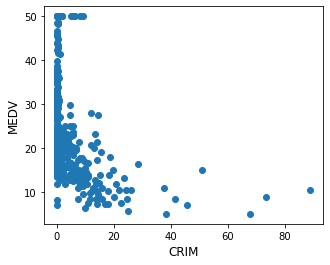

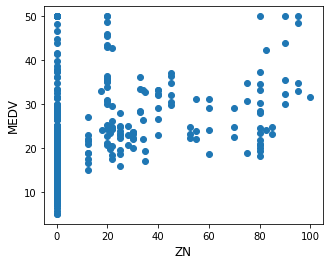

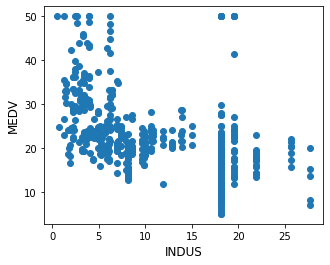

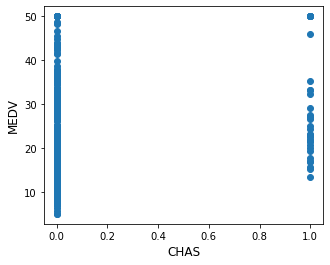

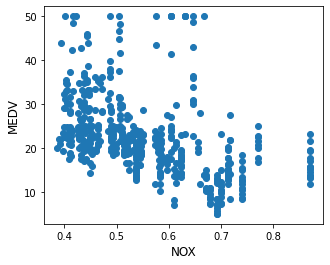

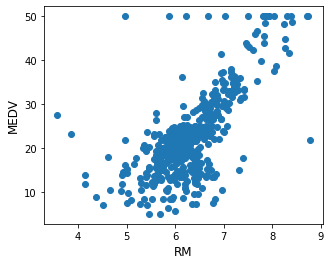

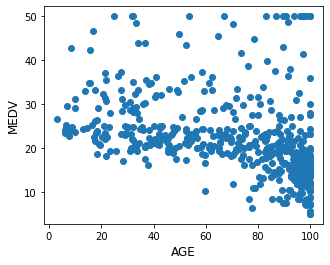

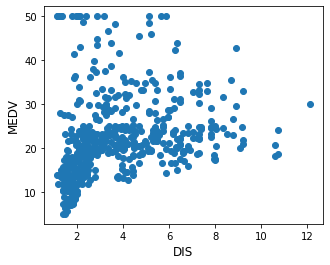

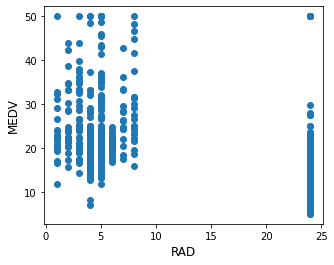

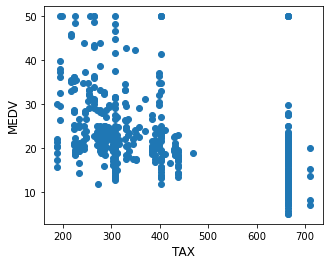

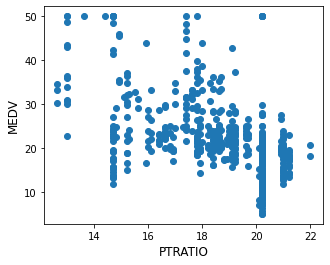

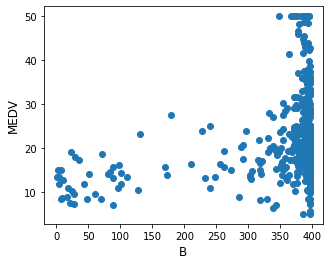

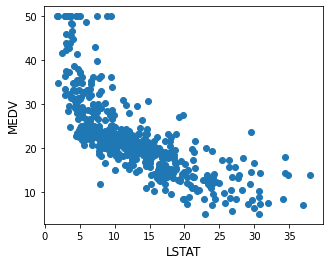

In [35]:
# plotting features against the target

for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('MEDV', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

<AxesSubplot:>

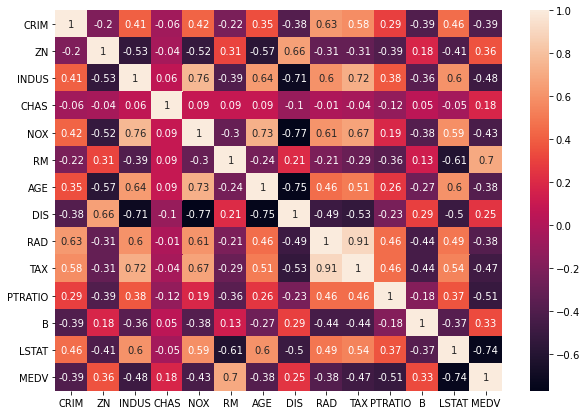

In [36]:
boston_cpy = boston_pd.copy()

boston_cpy['MEDV'] = boston.target  # attach target to the dataframe, 
boston_cpy.head()

correlation_matrix = boston_cpy.corr().round(2)
plt.figure(figsize = (10, 7))
sbn.heatmap(data=correlation_matrix, annot=True)

Observation:
 - RM has high positive correlation and Lstat has high negative correlation with the target(MEDV).
 - RM and MEDV - as the MEDV increases the value of RM increases linearly.Data have few outliers.
 - LSTAT and MEDV - MEDV decreases with increase in LSTAT.

### b. Store all the features and targets into X and Y respectively. How many instances and how many features does the dataset have? Split the data into 70% training set and 30% test set.

In [37]:
X = boston_pd
Y = boston_cpy['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
'''
                  Insatances             Features

Boston_dataset      506                     13
X_Training set      354                     13
Y_Training set      354                     0
X_Testing set       152                     13
X_Testing set       152                     0

'''

### c. Train a linear regression model using  selected feature.

In [38]:
# From the above plots and observation we see RM and LSTAT have high influence with target.

X = pd.DataFrame(np.c_[boston_cpy['LSTAT'], boston_cpy['RM']], columns = ['LSTAT','RM'])
Y = boston_cpy['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

### d. Test the model using the test set. Report sklearn.metrics.mean squared error and sklearn.metrics.r2 score between the predicting result and target.

In [39]:
from sklearn.metrics import mean_squared_error,r2_score


# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 5.291267334085863
R2 score is 0.6493177656003104


The model performance for testing set
--------------------------------------
RMSE is 6.041044703455955
R2 score is 0.6162026947666575
